In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 初始化线性可分的点

[[8, 7, 1], [10, 10, 1], [7, 8, 1], [3, 0, -1], [5, 1, -1], [0, 4, -1]]


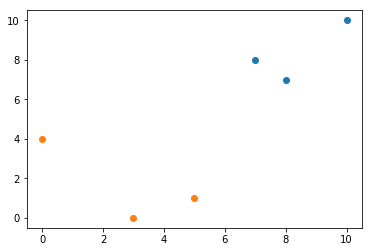

In [17]:
np.random.seed(1)
x1_true = np.random.randint(7,11,3)
x2_true = np.random.randint(7,11,3)
x1_false = np.random.randint(0,6,3)
x2_false = np.random.randint(0,6,3)
plt.plot(x1_true, x2_true, 'o')
plt.plot(x1_false, x2_false, 'o')

points = [[x1_true[i], x2_true[i], 1] for i in range(3)]
points.extend([[x1_false[i], x2_false[i], -1] for i in range(3)])
print (points)

plt.show()

### 实现感知机算法

分析感知机模型的三要素<br>
模型定义:<br>一组决策函数的集合 F = {f | y = f(X)}。
其中f(X)可以表示为: f(X) = sign(W*X + b)
$$
sign(x) = 
\left\{ 
\begin{array}{c}
 1,  x >=0  \\ 
-1,  x < 0
\end{array}
\right. 
$$

策略:<br>因为解决函数中存在着无数W和b的解，所以需要确定评估W,b值的方法,在感知机算法中选择的损失函数为:
$$ min L(W,b) = -\sum_{m=0}^i y{_i}*(W*X + b) \text{，m表示所有错误分类点的集合} $$
上面的公式解释为最小化错误分类的点到直线的距离。只要预测错误，那么y*(W*x+b)一定是异号，上面的求解结果一定是个正数，我们的目标是最小化上面的式子。之所以不适用Log损失函数是因为sign函数并不是连续可导的函数，不方便求最小值。

算法:<br>
这里的优化目标是找到一组W，b的值最小化损失函数的值，因为函数是连续的可导的，所以可以使用梯度下降的方法更新权重，更新公式如下:
$$
\begin{cases}
dW = dW + r * y{_i} * x{_i} \\ 
db = db + r * y{_i}
\end{cases}
$$
具体在代码实现的时候可以使用批量梯度下降的方法(BGD)或者随机梯度下降(SGD),没有太大的差别，这里代码实现的是SGD的方法。

In [22]:
# 初始化权重
W = np.zeros(2)
b = 0

# 定义激活函数，当大于等于0时激活函数输出为1，小于0时输出为-1
def active_function(z):
    return 1 if z >=0 else -1

while True:
    flag = 1
    for i in points:
        t = np.sum(W * i[:2]) + b
        a = active_function(t)
        # 当预测结果与标签不一致时代表预测错误需要更新权重
        if (a * i[2]) < 0:
            W[0] = W[0] + i[2]*i[0]
            W[1] = W[1] + i[2]*i[1]
            b = b + i[2]
            flag=0
    if (flag) == 1:
        break
print (W,b)

[ 0.  4.] -19


### 根据求出的权重，绘制出decision boundary
$0*x{_1} + 4*{_2} -19 = 0 \text {, 权重值依次为0, 4, -19}$ 

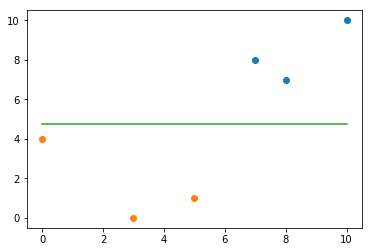

In [23]:
plt.plot(x1_true, x2_true, 'o')
plt.plot(x1_false, x2_false, 'o')
plt.plot([0,10], [19/4,19/4])
plt.show()